# Data cleaning (missing values) for HousePrice data.

We start with importing the necessary python libraries (numpy and pandas)

In [2]:
import numpy as np 
import pandas as pd
import os
os.chdir(r"C:\Users\Yakov\Downloads")

# Importing the dataset from Kaggle platform

You can download the dataset [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv)

In [4]:
houseprice = pd.read_csv(r"C:\Users\Yakov\Downloads\houseTrain.csv")

Now we have created the pandas dataframe from the data file (the csv).
*Let's see the first 15 rows to give us an idea of what it looks like.*

In [6]:
houseprice.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Create a function to show all features with missing values.

In [8]:
# To check how many columns have missing values:
def show_missing():
    missing = houseprice.columns[houseprice.isnull().any()].tolist()
    return missing
# Checking how much work there is to be done regarding cleaning up NaN's and missing values
houseprice[show_missing()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
# check correlation with LotArea
houseprice['LotFrontage'].corr(houseprice['LotArea'])

0.42609501877180816

In [10]:
# let's see if the square root of lotarea is not a better correlation. If so, we can
# use these values to replace missing values in LotFrontage feature
houseprice['SqrtLotArea']=np.sqrt(houseprice['LotArea'])
houseprice['LotFrontage'].corr(houseprice['SqrtLotArea'])

0.6020022167939364

In [11]:
# Looking at categorical values
def cat_exploration(column):
    return houseprice[column].value_counts()

In [12]:
# Imputing the missing values
def cat_imputation(column, value):
    houseprice.loc[houseprice[column].isnull(),column] = value

In [13]:
houseprice.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,118.806565
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,100.419122
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,101.892100
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,78.230429
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,86.139422


In [15]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


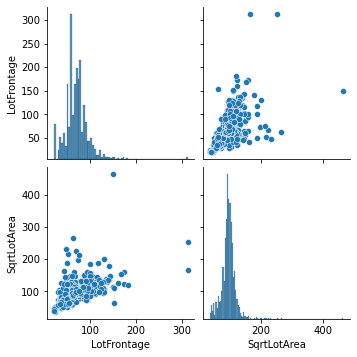

In [16]:
sns.pairplot(houseprice[['LotFrontage','SqrtLotArea']].dropna())

In [17]:
# take the cells with empty values in LotFrontage
cond = houseprice['LotFrontage'].isnull()

In [18]:
#replace those cells with values from the correlated SqrtLotArea
houseprice.LotFrontage[cond] = houseprice.SqrtLotArea[cond]

C:\Users\Yakov\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
houseprice.head(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242
5,6,50,RL,85.0000,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,118.806565
6,7,20,RL,75.0000,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,100.419122
7,8,60,RL,101.8921,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,101.892100


In [20]:
#check whether LotFrontage is no longer in list of missing values
houseprice[show_missing()].isnull().sum()

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [21]:
cat_exploration('Alley')


Grvl    50
Pave    41
Name: Alley, dtype: int64

In [22]:
# I assume empty fields here means no alley access
cat_imputation('Alley','None')

In [23]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
houseprice[show_missing()].isnull().sum()

MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [24]:
houseprice['MasVnrType'].isnull().sum()

8

In [25]:
# Is MasVnrArea empty when MasVnrType is empty?
houseprice[['MasVnrType','MasVnrArea']][houseprice['MasVnrType'].isnull()==True]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [26]:
# What do the values look like for MasVnrType?
cat_exploration('MasVnrType')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [27]:
# Mostely 'None', so we for now will replace NaN's with None's, 
# and for MasVnrArea replace with zero.
cat_imputation('MasVnrType', 'None')
cat_imputation('MasVnrArea', 0.0)

In [28]:
# A lot of variables which are all basement related. Create group, see group to check whether all are
# Nan and zero together:
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
houseprice[basement_cols][houseprice['BsmtQual'].isnull()==True]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0,0
39,NaN,NaN,NaN,NaN,NaN,0,0
90,NaN,NaN,NaN,NaN,NaN,0,0
102,NaN,NaN,NaN,NaN,NaN,0,0
156,NaN,NaN,NaN,NaN,NaN,0,0
182,NaN,NaN,NaN,NaN,NaN,0,0
259,NaN,NaN,NaN,NaN,NaN,0,0
342,NaN,NaN,NaN,NaN,NaN,0,0
362,NaN,NaN,NaN,NaN,NaN,0,0
371,NaN,NaN,NaN,NaN,NaN,0,0


In [29]:
# Little loop here. Goes through each of column (x) within
# the created basement 'group'. For each column it goes through the cat_imputation function which
# does this: 
# houseprice.loc[houseprice['x'].isnull(),'x'] = 'None'
# The 'FinSF' is to differentiate between the numerical (both contain 'FinSF' in header) 
# and the categorical which already contain zero's. 
for x in basement_cols:
    if 'FinSF'not in x:
        cat_imputation(x,'None')

Let's see how far along we are with the cleansing or our missing values in our houseprice data set:

In [30]:
houseprice[show_missing()].isnull().sum()

Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [31]:
cat_exploration('Electrical')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [32]:
houseprice['Electrical'].isnull().sum()

1

In [33]:
# Just one missing, impute most frequent value (SBrkr with 1334 instances)
cat_imputation('Electrical','SBrkr')

In [34]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [35]:
cat_exploration('FireplaceQu')

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [36]:
houseprice['FireplaceQu'].isnull().sum()

690

In [37]:
#checking whether FireplaceQu might be empty especially when fireplace itself is missing
houseprice[['Fireplaces','FireplaceQu']][houseprice['FireplaceQu'].isnull()==True]

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN
...,...,...
1452,0,NaN
1453,0,NaN
1454,0,NaN
1458,0,NaN


In [38]:
#So yes, it seems that indeed FireplaceQu is empty when Fireplaces is missing.
#Assumption therefore will be that FireplacesQu(ality) is empty because there is no fireplace.
cat_imputation('FireplaceQu','None')

In [39]:
pd.crosstab(houseprice.Fireplaces, houseprice.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,690,0,0
1,19,28,324,0,20,259
2,4,4,54,0,0,53
3,1,1,2,0,0,1


In [40]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

*Here we see there is a group of 5 garage related features, also with 81 missings each..*

In [43]:
#Same idea as with basement columns but now for garage related features:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']
houseprice[garage_cols][houseprice['GarageType'].isnull()==True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


In [44]:
#Garage Imputation
# This is similar to the loop done for the basement features. The difference here is that
# this one has to differentate feature datatypes to replace categoricals missings with 'none'
# and numerical missings with '0'.

for i in garage_cols:
    if houseprice[i].dtype==np.object:
        cat_imputation(i,'None')
    else:
        cat_imputation(i, 0)
    

In [45]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [46]:
cat_exploration('PoolQC')

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [47]:
# is Poolarea missing when PoolQC is missing?

houseprice[['PoolArea','PoolQC']][houseprice['PoolQC'].isnull()==True]

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1455,0,NaN
1456,0,NaN
1457,0,NaN
1458,0,NaN


In [48]:
# So, here I am going to delete this feature because Pool itself is so often not present, poolQC
# will not be a good feature for modelling. 
del houseprice['PoolQC']

In [49]:
cat_imputation('Fence', 'None')

In [50]:
cat_imputation('MiscFeature', 'None')

In [51]:
# Let's see how much work there is to be done regarding cleaning up NaN's and missing values
# this bit will come back several times to check out progress.

houseprice[show_missing()].isnull().sum()

Series([], dtype: float64)

Now we have a basic clean dataset without missing values (NaN's) to start EDA, feature engineering, modelling and (cross)validating.